In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")

from Functions.UNSW_DF import * 

C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Original Dataset
df_org  = pd.read_csv("../KNN/K_SCORES(1-70).csv")      # 1 to 70
df_K_200 = pd.read_csv("../KNN/K_SCORES(1-200).csv")    # 1 to 200

# Reconfigured Dataset
df = pd.read_csv("../KNN/K_SCORES(1-70).csv")
df.drop("error", axis=1, inplace=True)
df_melt = pd.melt(df, id_vars="K", var_name="metric", value_name="score")

## K score 1 to 70 error plot

In [ ]:
ax = sns.set(rc={"figure.figsize":(20, 12), 'axes.facecolor':'white',})
ax = sns.set_style("whitegrid")
ax = sns.lineplot(x='K',y='error', data=df_org, color ="g", marker="s", linewidth=3, markersize=10)

ax.set_xlabel("K-value",fontsize=20)
ax.set_ylabel("Error", fontsize=20)

ax.figure.savefig("Analysis_KNN/K_1to70_error.png", dpi=400)

## K score 1 to 200 error plot

In [ ]:
ax = sns.set(rc={"figure.figsize":(20, 12), 'axes.facecolor':'white',})
ax = sns.set_style("whitegrid")
ax = sns.lineplot(x='K', y='error', data=df_K_200, color ="g", marker="s", linewidth=2, markersize=7)

ax.set_xlabel("K-value",fontsize=20)
ax.set_ylabel("Error", fontsize=20)

ax.figure.savefig("Analysis_KNN/K_1to200_error.png", dpi=400)

## K Bar plot

In [ ]:
sns.set(rc={"figure.figsize":(60, 12), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

In [ ]:
ax = sns.barplot(x='K', y='score', hue='metric', data=df_melt, palette="viridis")

# Sub bar plots

In [ ]:
df_p1 = df_org[:35]
df_p2 = df_org.iloc[35:71]

#f_p1, df_p2 = df_org.drop("error", axis=1, inplace=True), df_org.drop("error", axis=1)

df_p1 = df_org[:35]
df_p2 = df_org.iloc[35:71]

df_p1_melt = pd.melt(df_p1, id_vars="K", var_name="metric", value_name="score")
df_p2_melt = pd.melt(df_p2, id_vars="K", var_name="metric", value_name="score")

In [ ]:
sns.set(rc={"figure.figsize":(21, 13), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=1, nrows=2)

ax1= sns.barplot(x='K', y='score', hue='metric', data=df_p1_melt, palette="viridis", ax=axs[0])

ax2= sns.barplot(x='K', y='score', hue='metric', data=df_p2_melt, palette="viridis", ax=axs[1])

ax1 = ax1.legend(bbox_to_anchor=(1.01, 0), loc=2, borderaxespad=0.)
ax2 = ax2.legend([],[], frameon=False)

plt.savefig("Analysis_KNN/KNN_1to70_bar.png", dpi=400)

# Line plot for accuracy

In [ ]:
ax = sns.set(rc={"figure.figsize":(20, 12), 'axes.facecolor':'white',})
ax = sns.set_style("whitegrid")
ax = sns.lineplot(x='K',y='test_acc', data=df_org, color ="g", marker="s", linewidth=3, markersize=10)


ax.set_xlabel("K-value",fontsize=20)
ax.set_ylabel("Error", fontsize=20)

#ax.figure.savefig("Analysis_KNN/K_1to70_error.png", dpi=400)

In [ ]:
df_line = pd.read_csv("../KNN/K_SCORES(1-70).csv")

In [ ]:
ax_line = sns.set(rc={"figure.figsize":(18, 12), 'axes.facecolor':'white',})
ax_line = sns.set_style("whitegrid")
ax_line = sns.lineplot(x = "K", y = "score", hue = "metric", data = df_melt, linewidth=3, marker="s", palette="viridis")
ax_line.figure.savefig("Analysis_KNN/K_1to70_linescores.png", dpi=400)

# Finding Values

In [ ]:
df_org  = pd.read_csv("../KNN/K_SCORES(1-70).csv")

In [ ]:
print(df.train_acc.min())
print(df.test_acc.min())

# Dist plot

In [3]:
def create_distplot(dataframe, plot_title="", xsize=30, ysize=24):
    ax_comb2 = sns.set(rc={"figure.figsize":(xsize, ysize), 'axes.facecolor':'white',})
    ax_comb2 = sns.set_style("whitegrid")

    dataset = dataframe
    fig, axs = plt.subplots(ncols=4, nrows=2)
    
    ax_comb2 = sns.boxplot(x ="K", y="score", data=dataset, palette="viridis", ax=axs[0, 0])
    ax_comb2.set_title("Box Plot", size=16)

    
    ax_comb2 = sns.violinplot(x ="K", y="score", data=dataset, palette="viridis", ax=axs[0, 1])
    ax_comb2.set_title("Violin Plot", size=16)


    ax_comb2 = sns.histplot(data=dataset, x="score", hue="K", palette="viridis", multiple="stack", ax=axs[0, 2])
    ax_comb2.set_title("Histogram Plot", size=16)


    ax_comb2 = sns.kdeplot(data=dataset,  x="score", hue="K", multiple="fill", palette="viridis",ax=axs[0, 3])
    ax_comb2.set_title("Kernel density estimate (KDE) Plot", size=16)


    ax_comb2 = sns.kdeplot(data=dataset, x="score", hue="K", fill=True, common_norm=False, palette="viridis",alpha=.5,ax=axs[1, 0])
    ax_comb2.set_title("Kernel density estimate (KDE) Plot", size=16)


    ax_comb2 = sns.kdeplot(data=dataset, x="score", hue="K", common_norm=False, palette="viridis", linewidth=3, ax=axs[1, 1])
    ax_comb2.set_title("Kernel density estimate (KDE) Plot", size=16)


    ax_comb2 = sns.kdeplot(data=dataset, x="score", hue="K", cumulative=True, common_norm=False, common_grid=True,palette="viridis", linewidth=3,ax=axs[1, 2])
    ax_comb2.set_title("Kernel density estimate (KDE) Plot", size=16)


    ax_comb2 = sns.kdeplot(data=dataset, x="score", hue="K", multiple="stack", palette="viridis",ax=axs[1, 3])
    ax_comb2.set_title("Kernel density estimate (KDE) Plot", size=16)


    plt.suptitle(plot_title, fontsize=20)
    #plt.tight_layout()
    ax_comb2.figure.savefig("Analysis_KNN/KNN_distplot.png", bbox_inches='tight', dpi=400)

In [4]:
df_pre_melt  = pd.read_csv("../KNN/K_SCORES(1-70).csv")
df_pre_melt = df_pre_melt[0:15]
df_melt2 = pd.melt(df_pre_melt, id_vars="K", var_name="metric", value_name="score")

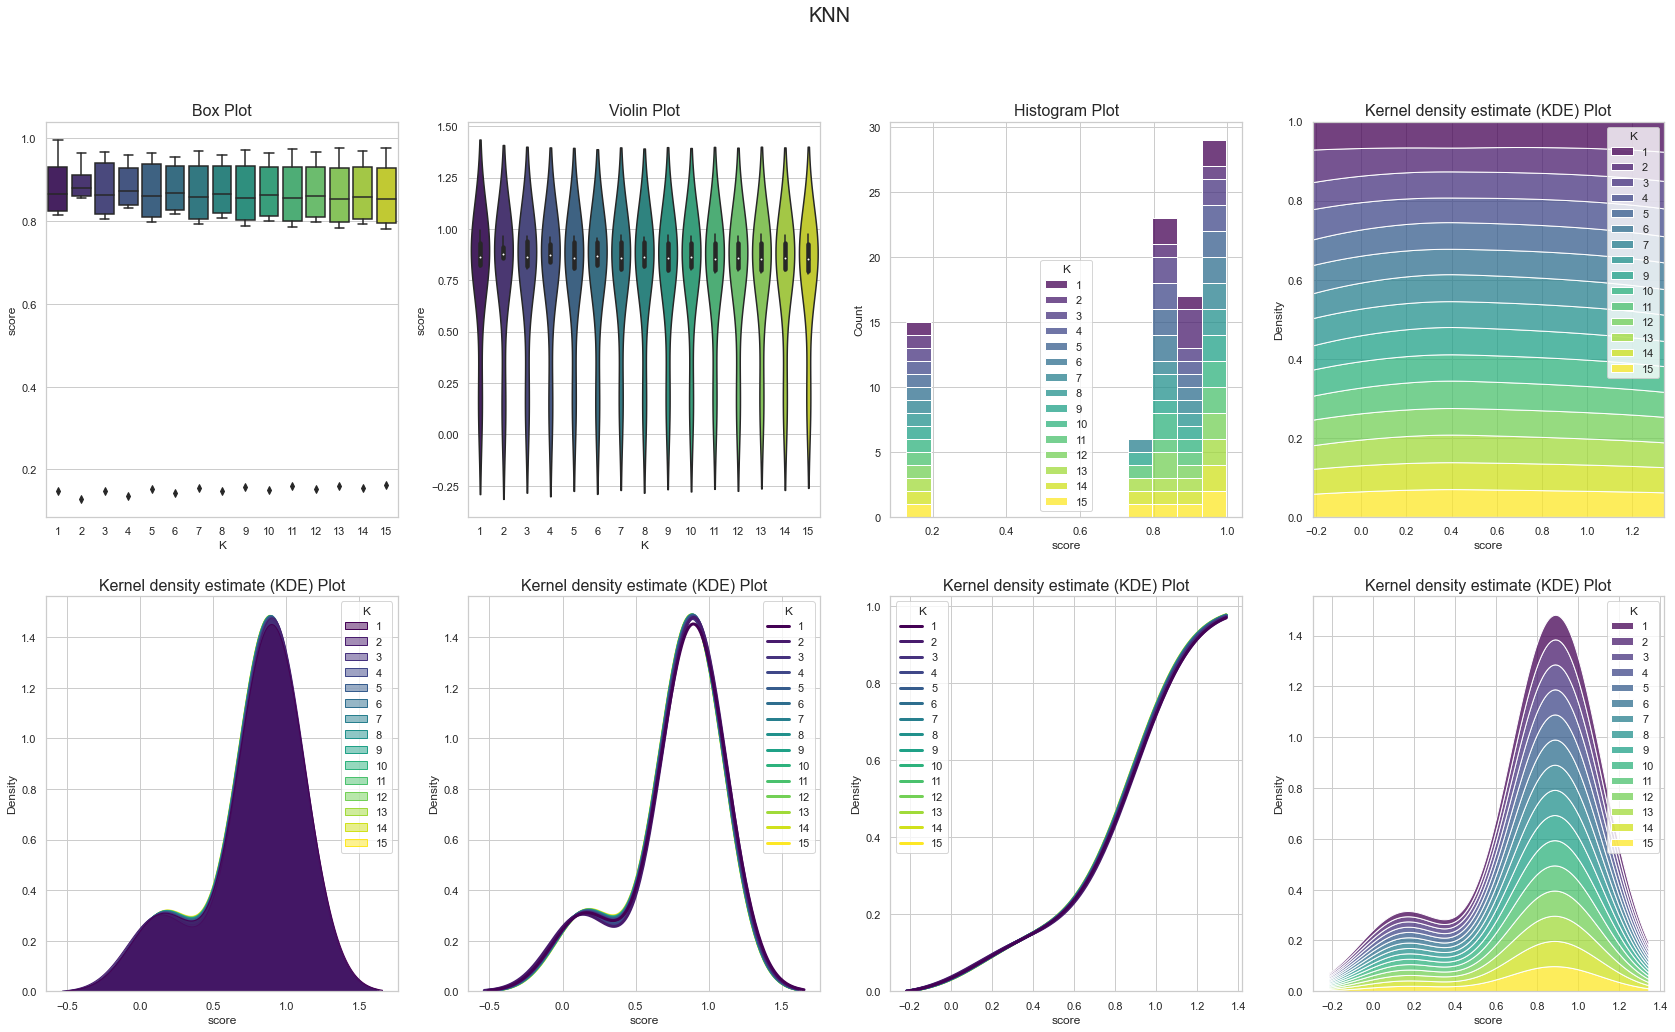

In [5]:
create_distplot(df_melt2, plot_title="KNN", xsize=29, ysize=16)